In [99]:
import pandas as pd 
import numpy as np
from scipy.signal import argrelextrema
import scipy.fftpack
import warnings
warnings.filterwarnings('ignore')

# Get the CSV data
filepath = '/Users/fatimayousuf/Downloads/Chaotic_Circuit.csv'

# Read the csv file and organize data into a pandas dataframe
df = pd.read_csv(filepath)
df.columns = ['t', 'v']
df = df.iloc[700:] # remove the transient phase of data

# Separate time and voltage data into lists
t = df[df.columns[0]].to_list()
v = df[df.columns[1]].to_list()

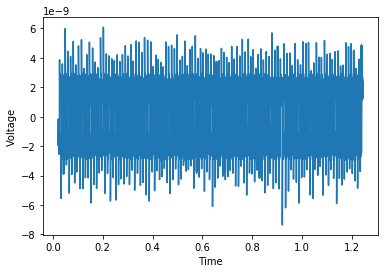

In [70]:
import matplotlib.pyplot as plt

# Plot the collected data
plt.plot(t, v)
plt.ylabel('Voltage')
plt.xlabel('Time')
plt.show()

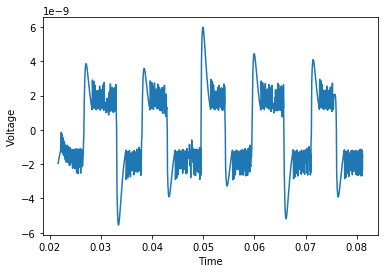

In [78]:
# The above graph is pretty crazy. We can zoom in on a section of data to get a better idea of what's going on.

df_zoomed_in = df.iloc[:2500] # Get the first 2500 rows of data
t_zoom = df_zoomed_in[df_zoomed_in.columns[0]].to_list()
v_zoom = df_zoomed_in[df_zoomed_in.columns[1]].to_list()

# Plot the zoomed in data
plt.plot(t_zoom, v_zoom)
plt.ylabel('Voltage')
plt.xlabel('Time')
plt.show()

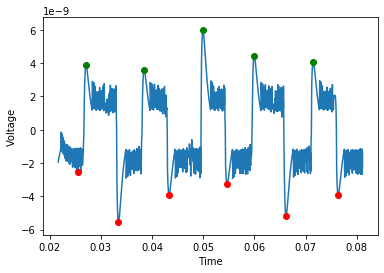

In [79]:
# Calculate local mins and maxes of noisy data
n=int(3e2) # number of points to be checked before and after 

# Find local peaks
df_zoomed_in['min'] = df_zoomed_in.iloc[argrelextrema(df_zoomed_in.v.values, np.less_equal, order=n)[0]]['v']
df_zoomed_in['max'] = df_zoomed_in.iloc[argrelextrema(df_zoomed_in.v.values, np.greater_equal, order=n)[0]]['v']

# Plot the collected data
plt.plot(t_zoom, v_zoom, zorder = 0)
plt.scatter(df_zoomed_in['t'], df_zoomed_in['min'], c='r', zorder = 100)
plt.scatter(df_zoomed_in['t'], df_zoomed_in['max'], c='g', zorder = 200)
plt.ylabel('Voltage')
plt.xlabel('Time')
plt.show()

In [75]:
# Print the values of the points of attraction (maxes)
attractors = df_zoomed_in[~df_zoomed_in['max'].isnull()]
print("Points of Attraction: ")
print(attractors[['t', 'v']])

Points of Attraction: 
             t             v
922   0.027109  3.865413e-09
1402  0.038440  3.583727e-09
1908  0.049937  5.986117e-09
2308  0.059939  4.444850e-09
2807  0.071469  4.093477e-09


In [98]:
# Calculate the period. Avg time difference between each point of attraction.

times = attractors.reset_index() # this chanages the indexes from 922, 1402, 1908,... to 1,2,3...

period_sum = 0
n = 0
for index, row in times.iterrows():
    if index==0:
        continue
    period_sum += (times['t'][index] - times['t'][index-1])
    n+=1
    
avg_period = period_sum/n
print(f"Avg Period: {avg_period}")

Avg Period: 0.011090049200243961


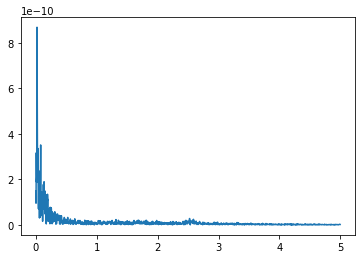

In [121]:
# Get the sampling frequency
sampling_interval = attractors['t'].iloc[1]-attractors['t'].iloc[0]
sampling_frequency = 1/sampling_interval

# Create a Fourier spectrum
fourierTransform = np.fft.fft(v_zoom)/len(v_zoom)              # Normalize amplitude
fourierTransform = fourierTransform[range(int(len(v_zoom)/2))] # Exclude sampling frequency
tpCount     = len(v_zoom)
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod

# Plot the spectrum
fig, ax = plt.subplots()
ax.plot(frequencies, np.abs(fourierTransform))
plt.show()

I am not sure why there is a big spike around frequency = 0. However, since the simulation data is on such a small scale, it will be really difficult to see anything meaningful in the fourier transformation.

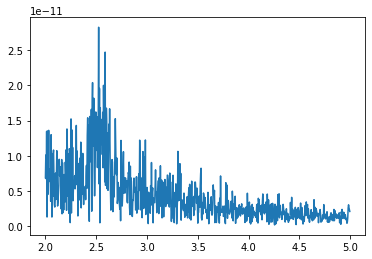

In [126]:
# I kind of see a small spike around 2.5, so I zoomed in a little there
fig, ax = plt.subplots()
ax.plot(frequencies[500:], np.abs(fourierTransform[500:]))
plt.show()